## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [4]:
x = np.linspace(0,20)
a = 1
b = 2
y = a * x + b

In [5]:
print(x)
print(y)

[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
[ 2.          2.40816327  2.81632653  3.2244898   3.63265306  4.04081633
  4.44897959  4.85714286  5.26530612  5.67346939  6.08163265  6.48979592
  6.89795918  7.30612245  7.71428571  8.12244898  8.53061224  8.93877551
  9.34693878  9.75510204 10.16326531 10.57142857 10.97959184 11.3877551
 11.79591837 12.20408163 12.6122449  13.02040816 13.42857143 13.83673469
 14.24489796 14.65306122 15

#### Plot your data points. 

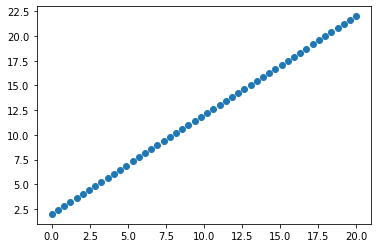

In [7]:
plt.scatter(x,y)

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

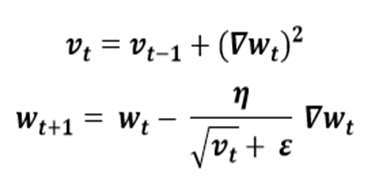

In [926]:
e = 1 * (10**-8)
alfa = 1.5
theta0 = 0
theta1 = 0
v0 = 0 
v1 = 0
n = 1000

def adagard( x , y , n , theta0 , theta1 , v0 , v1 , alfa ,e ):
    m = len(x)
    cost_lst = []
    theta0_lst = []
    theta1_lst = []
    hypo_lst = []
    n_iter = 0
    for i in range(n):
        hypo = theta0 + theta1 * x
        cost_func = 1/(2*m) * np.sum( np.square(hypo - y) )
        
        diff_theta0 = (1/m) * np.sum((hypo - y) )
        diff_theta1 = (1/m) * np.sum((hypo - y)*x)
        
        v0 = v0 + diff_theta0**2
        v1 = v1 + diff_theta1**2
        
        theta0 = theta0 - (alfa*diff_theta0)/(e + np.sqrt( v0 ))
        theta1 = theta1 - (alfa*diff_theta1)/(e + np.sqrt( v1 ))
        
        gradient = (diff_theta0**2 + diff_theta1**2)**0.5
        n_iter+=1
        
        cost_lst.append(cost_func)
        theta0_lst.append(theta0)
        theta1_lst.append(theta1)
        hypo_lst.append(hypo)
        
        if gradient < .001:
            break
            
    return cost_lst , theta0_lst ,theta1_lst , hypo_lst , theta0 , theta1 ,n_iter
        
    

In [927]:
cost_lst , theta0_lst ,theta1_lst , hypo_lst , theta0 , theta1 , n_iter = adagard( x , y , n , theta0 , theta1 , v0 , v1 , alfa ,e )   

In [928]:
print(n_iter)

206


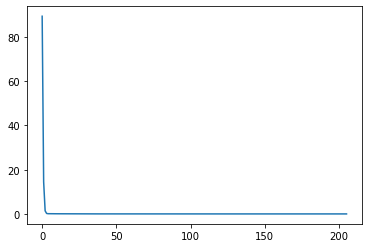

In [929]:
plt.plot(cost_lst)

In [930]:
y_predicted = theta0 + theta1 * x

In [931]:
from sklearn.metrics import r2_score
r2_score(y, y_predicted)

0.9999999392946802

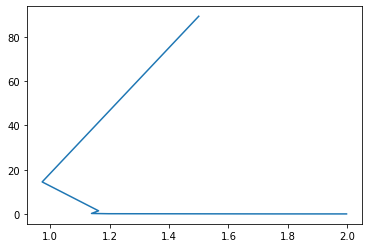

In [932]:
plt.plot(theta0_lst,cost_lst)

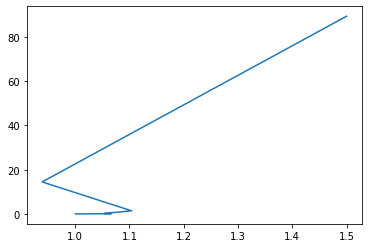

In [933]:
plt.plot(theta1_lst,cost_lst)

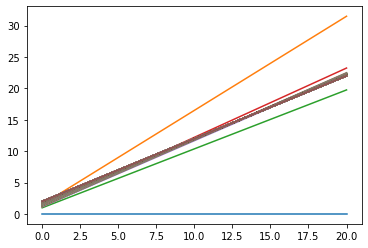

In [934]:
for i in range(len(hypo_lst)):
    plt.plot(x,hypo_lst[i])

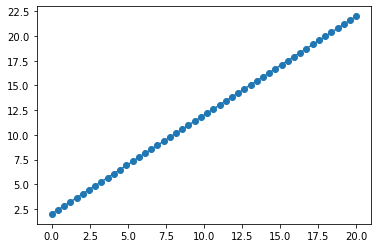

In [935]:
plt.scatter(x,y)
plt.plot(x,y_predicted)
plt.show()

In [937]:
#second trail 
e = 1 * (10**-8)
alfa = 5
theta0 = 0
theta1 = 0
v0 = 0 
v1 = 0
n = 1000

In [938]:
cost_lst , theta0_lst ,theta1_lst , hypo_lst , theta0 , theta1,n_iter = adagard( x , y , n , theta0 , theta1 , v0 , v1 , alfa ,e )   

In [939]:
print(n_iter)

220


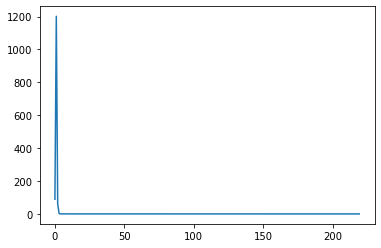

In [940]:
plt.plot(cost_lst)

In [941]:
from sklearn.metrics import r2_score
r2_score(y, y_predicted)

0.9999999392946802

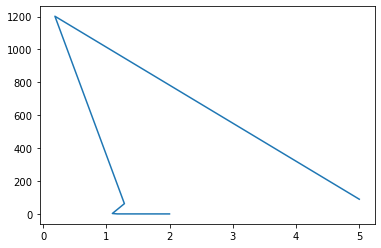

In [942]:
plt.plot(theta0_lst,cost_lst)

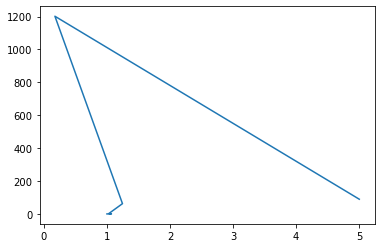

In [943]:
plt.plot(theta1_lst,cost_lst)

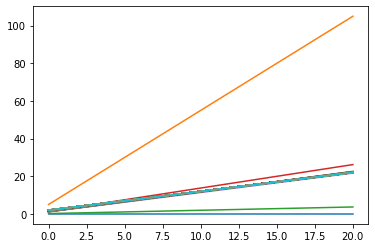

In [944]:
for i in range(len(hypo_lst)):
    plt.plot(x,hypo_lst[i])

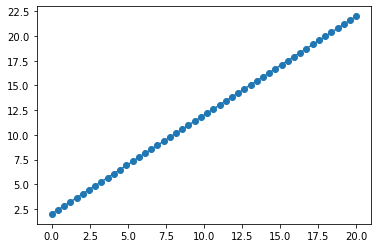

In [945]:
plt.scatter(x,y)
plt.plot(x,y_predicted)
plt.show()

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

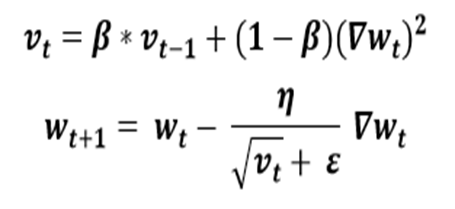

In [946]:
e = 1 * (10**-8)
alfa = .005
theta0 = 0
theta1 = 0
v0 = 0 
v1 = 0
n = 1000
beta = 0.98

def rms_prop( x , y , n , theta0 , theta1 , v0 , v1 , alfa ,e ,beta ):
    m = len(x)
    cost_lst = []
    theta0_lst = []
    theta1_lst = []
    hypo_lst = []
    n_iter = 0
    for i in range(n):
        hypo = theta0 + theta1 * x
        cost_func = 1/(2*m) * np.sum( np.square(hypo - y) )
        
        diff_theta0 = (1/m) * np.sum((hypo - y) )
        diff_theta1 = (1/m) * np.sum((hypo - y)*x)
        
        v0 = beta * v0 + (1 - beta) * diff_theta0**2
        v1 = beta * v1 + (1 - beta) * diff_theta1**2
        
        theta0 = theta0 - (alfa*diff_theta0)/(e + np.sqrt( v0 ))
        theta1 = theta1 - (alfa*diff_theta1)/(e + np.sqrt( v1 ))
        
        gradient = (diff_theta0**2 + diff_theta1**2)**0.5
        n_iter+=1
        
        cost_lst.append(cost_func)
        theta0_lst.append(theta0)
        theta1_lst.append(theta1)
        hypo_lst.append(hypo)
        
        if gradient < .001:
            break
            
    return cost_lst , theta0_lst ,theta1_lst , hypo_lst , theta0 , theta1 ,n_iter
        
    

In [947]:
cost_lst , theta0_lst ,theta1_lst , hypo_lst , theta0 , theta1,n_iter = rms_prop( x , y , n , theta0 , theta1 , v0 , v1 , alfa ,e ,beta )  

781


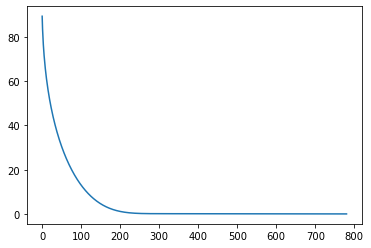

In [948]:
plt.plot(cost_lst)
print(n_iter)


In [949]:
y_predicted = theta0 + theta1 * x

In [950]:
from sklearn.metrics import r2_score
r2_score(y, y_predicted)

0.999999918696513

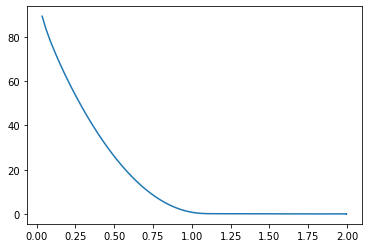

In [951]:
plt.plot(theta0_lst,cost_lst)

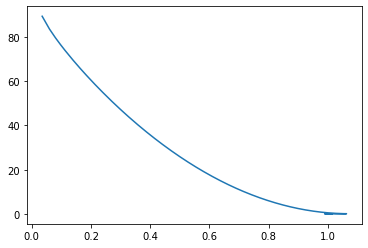

In [952]:
plt.plot(theta1_lst,cost_lst)

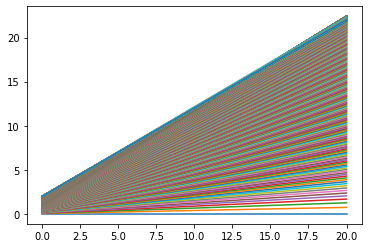

In [953]:
for i in range(len(hypo_lst)):
    plt.plot(x,hypo_lst[i])

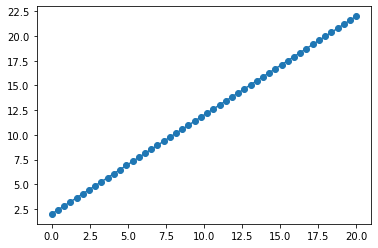

In [954]:
plt.scatter(x,y)
plt.plot(x,y_predicted)
plt.show()

In [955]:
#second trail 
e = 1 * (10**-8)
alfa = .001
theta0 = 0
theta1 = 0
v0 = 0 
v1 = 0
n = 1000
beta = 0.98


In [956]:
cost_lst , theta0_lst ,theta1_lst , hypo_lst , theta0 , theta1,n_iter = rms_prop( x , y , n , theta0 , theta1 , v0 , v1 , alfa ,e ,beta )  

1000


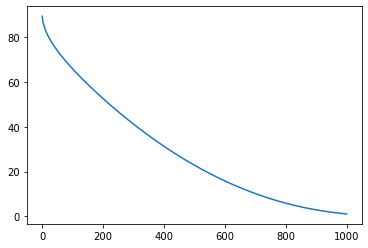

In [957]:
plt.plot(cost_lst)
print(n_iter)

In [958]:
y_predicted = theta0 + theta1 * x

In [959]:
from sklearn.metrics import r2_score
r2_score(y, y_predicted)

0.9379370919777595

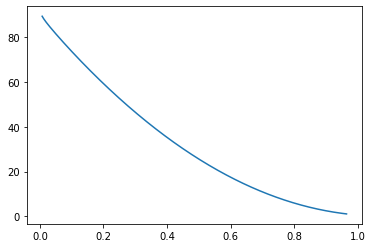

In [960]:
plt.plot(theta0_lst,cost_lst)

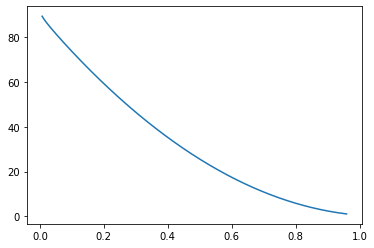

In [961]:
plt.plot(theta1_lst,cost_lst)

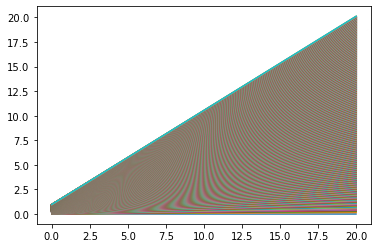

In [962]:
for i in range(len(hypo_lst)):
    plt.plot(x,hypo_lst[i])

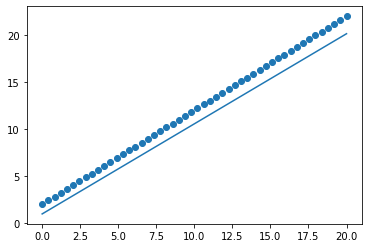

In [963]:
plt.scatter(x,y)
plt.plot(x,y_predicted)
plt.show()

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

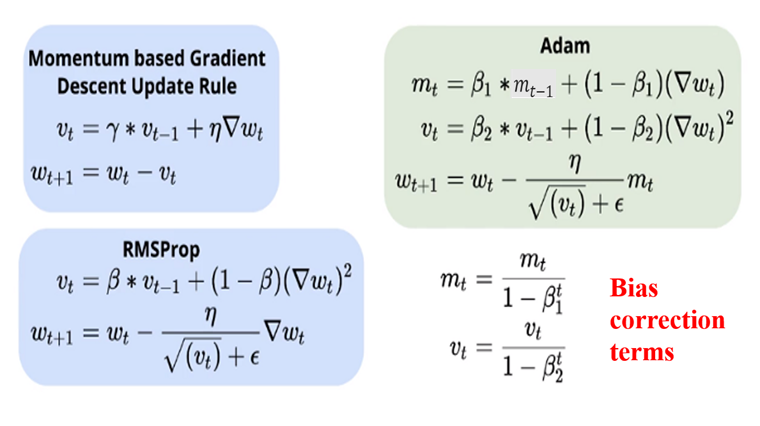

In [964]:
e = 1 * (10**-8)
alfa = .01
theta0 = 0
theta1 = 0
v0 = 0 
v1 = 0
m0 = 0 
m1 = 0
n = 1000
beta1 = 0.7
beta2 = .5

def unbaised_adam( x , y , n , theta0 , theta1 , m0 , m1 , v0 , v1 , alfa ,e ,beta1 , beta2 ):
    m = len(x)
    cost_lst = []
    theta0_lst = []
    theta1_lst = []
    hypo_lst = []
    n_iter = 0
   
    for i in range(n):
        hypo = theta0 + theta1 * x
        cost_func = 1/(2*m) * np.sum( np.square(hypo - y) )
        
        diff_theta0 = (1/m) * np.sum((hypo - y) )
        diff_theta1 = (1/m) * np.sum((hypo - y)*x)
        
        m0 = beta1 * m0 + (1 - beta1) * diff_theta0
        m1 = beta1 * m1 + (1 - beta1) * diff_theta1
        
        v0 = beta2 * v0 + (1 - beta2) * diff_theta0**2
        v1 = beta2 * v1 + (1 - beta2) * diff_theta1**2
        
        m0_hat = m0 / (1 - beta1**i)
        m1_hat = m1 / (1 - beta1**i)
        
        v0_hat = v0 / (1 - beta2**i)
        v1_hat = v1 / (1 - beta2**i)
        
        
        theta0 = theta0 - (alfa * m0)/(e + np.sqrt( v0 ))
        theta1 = theta1 - (alfa * m1)/(e + np.sqrt( v1 ))
        
        gradient = (diff_theta0**2 + diff_theta1**2)**0.5
        n_iter+=1
        
        cost_lst.append(cost_func)
        theta0_lst.append(theta0)
        theta1_lst.append(theta1)
        hypo_lst.append(hypo)
       
        
        if gradient < .001:
            break
            
    return cost_lst , theta0_lst ,theta1_lst , hypo_lst , theta0 , theta1 ,n_iter
        
    

In [965]:
cost_lst , theta0_lst ,theta1_lst , hypo_lst , theta0 , theta1 , n_iter = unbaised_adam( x , y , n , theta0 , theta1 , m0 , m1 , v0 , v1 , alfa ,e ,beta1 , beta2 )

<ipython-input-964-be945db4fe5f>:34: RuntimeWarning: divide by zero encountered in double_scalars
  m0_hat = m0 / (1 - beta1**i)
<ipython-input-964-be945db4fe5f>:35: RuntimeWarning: divide by zero encountered in double_scalars
  m1_hat = m1 / (1 - beta1**i)
<ipython-input-964-be945db4fe5f>:37: RuntimeWarning: divide by zero encountered in double_scalars
  v0_hat = v0 / (1 - beta2**i)
<ipython-input-964-be945db4fe5f>:38: RuntimeWarning: divide by zero encountered in double_scalars
  v1_hat = v1 / (1 - beta2**i)


1000


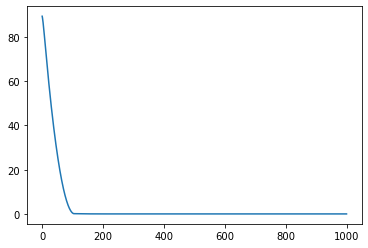

In [966]:
plt.plot(cost_lst)
print(n_iter)

In [967]:
y_predicted = theta0 + theta1 * x

In [968]:
from sklearn.metrics import r2_score
r2_score(y, y_predicted)

0.9999983894295016

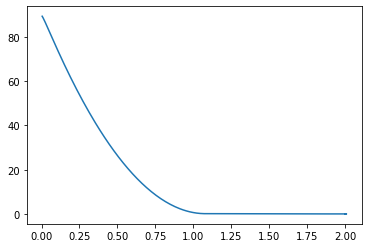

In [969]:
plt.plot(theta0_lst,cost_lst)

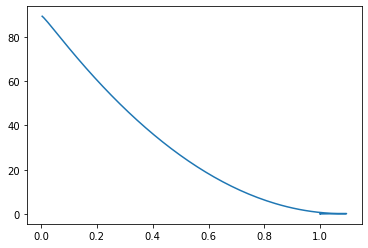

In [970]:
plt.plot(theta1_lst,cost_lst)

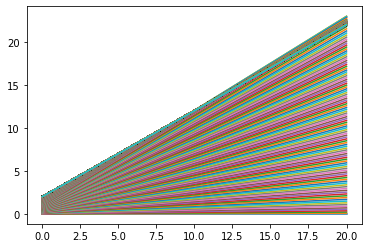

In [971]:
for i in range(len(hypo_lst)):
    plt.plot(x,hypo_lst[i])

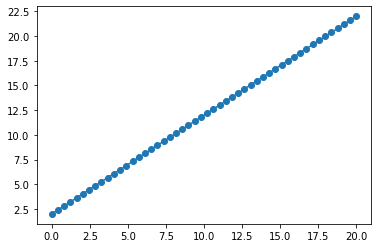

In [972]:
plt.scatter(x,y)
plt.plot(x,y_predicted)
plt.show()

In [973]:
#second trail 
e = 1 * (10**-8)
alfa = .5
theta0 = 0
theta1 = 0
v0 = 0 
v1 = 0
m0 = 0 
m1 = 0
n = 1000
beta1 = 0.8
beta2 = .6

In [974]:
cost_lst , theta0_lst ,theta1_lst , hypo_lst , theta0 , theta1 , n_iter = unbaised_adam( x , y , n , theta0 , theta1 , m0 , m1 , v0 , v1 , alfa ,e ,beta1 , beta2 )

<ipython-input-964-be945db4fe5f>:34: RuntimeWarning: divide by zero encountered in double_scalars
  m0_hat = m0 / (1 - beta1**i)
<ipython-input-964-be945db4fe5f>:35: RuntimeWarning: divide by zero encountered in double_scalars
  m1_hat = m1 / (1 - beta1**i)
<ipython-input-964-be945db4fe5f>:37: RuntimeWarning: divide by zero encountered in double_scalars
  v0_hat = v0 / (1 - beta2**i)
<ipython-input-964-be945db4fe5f>:38: RuntimeWarning: divide by zero encountered in double_scalars
  v1_hat = v1 / (1 - beta2**i)


374


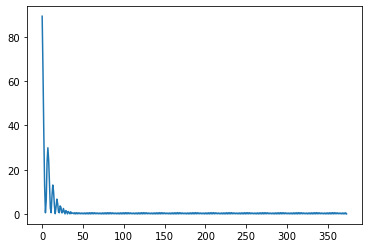

In [975]:
plt.plot(cost_lst)
print(n_iter)

In [976]:
from sklearn.metrics import r2_score
r2_score(y, y_predicted)

0.9999983894295016

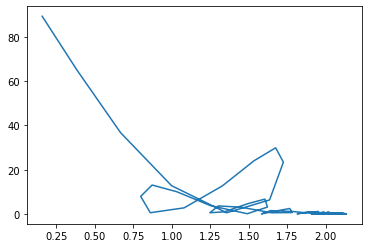

In [977]:
plt.plot(theta0_lst,cost_lst)

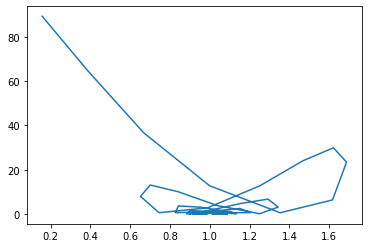

In [978]:
plt.plot(theta1_lst,cost_lst)

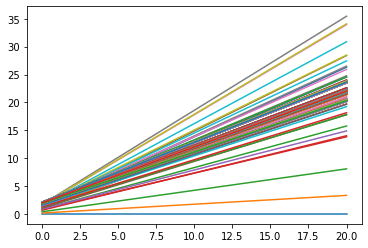

In [979]:
for i in range(len(hypo_lst)):
    plt.plot(x,hypo_lst[i])

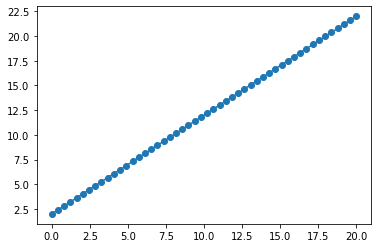

In [980]:
plt.scatter(x,y)
plt.plot(x,y_predicted)
plt.show()

In [981]:
#comparison between 3 algorithms in same parameters 

In [1066]:
e = 1 * (10**-8)
alfa = .1
theta0 = 0
theta1 = 0
v0 = 0 
v1 = 0
m0 = 0 
m1 = 0
n = 5000
#beta1 associated with momentum term 
beta1 = 0.7
# beta2 associated with rms term 
beta2 = .9

In [1067]:
#1-adagard 
cost_lst , theta0_lst ,theta1_lst , hypo_lst , theta0 , theta1 ,n_iter= adagard( x , y , n , theta0 , theta1 , v0 , v1 , alfa ,e )   

5000


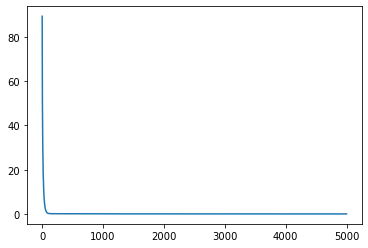

In [1068]:
plt.plot(cost_lst)
print(n_iter)

In [1069]:
y_predicted = theta0 + theta1 * x

In [1070]:
from sklearn.metrics import r2_score
r2_score(y, y_predicted)

0.9999794540054007

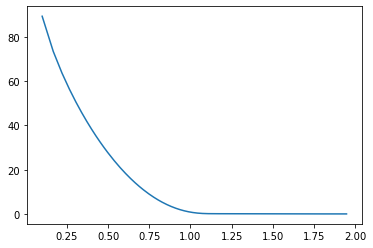

In [1071]:
plt.plot(theta0_lst,cost_lst)

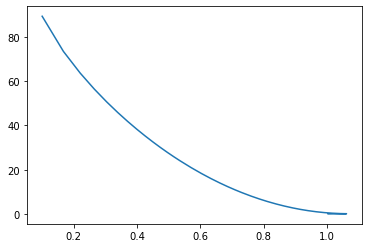

In [1072]:
plt.plot(theta1_lst,cost_lst)

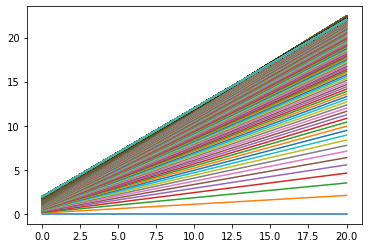

In [1073]:
for i in range(len(hypo_lst)):
    plt.plot(x,hypo_lst[i])

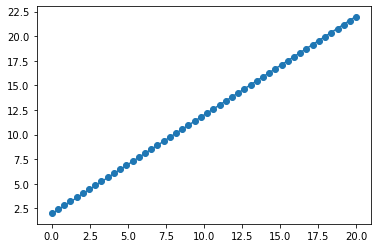

In [1074]:
plt.scatter(x,y)
plt.plot(x,y_predicted)
plt.show()

In [1075]:
#rms_prop and will use beta2 to see difference
cost_lst , theta0_lst ,theta1_lst , hypo_lst , theta0 , theta1,n_iter = rms_prop( x , y , n , theta0 , theta1 , v0 , v1 , alfa ,e ,beta2 )  

5000


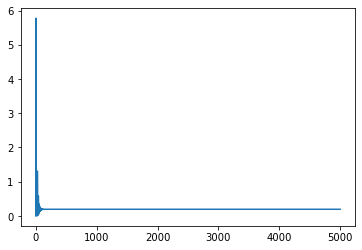

In [1076]:
plt.plot(cost_lst)
print(n_iter)

In [1077]:
y_predicted = theta0 + theta1 * x

In [1078]:
from sklearn.metrics import r2_score
r2_score(y, y_predicted)

0.9887808824105883

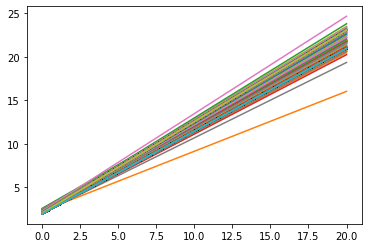

In [1079]:
for i in range(len(hypo_lst)):
    plt.plot(x,hypo_lst[i])

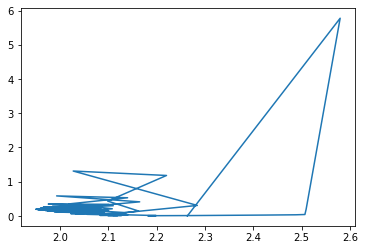

In [1080]:
plt.plot(theta0_lst,cost_lst)

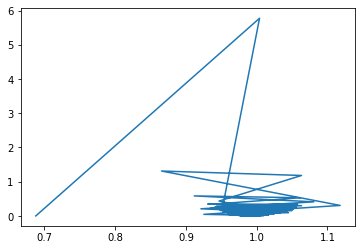

In [1081]:
plt.plot(theta1_lst,cost_lst)

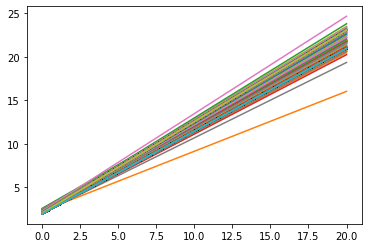

In [1082]:
for i in range(len(hypo_lst)):
    plt.plot(x,hypo_lst[i])

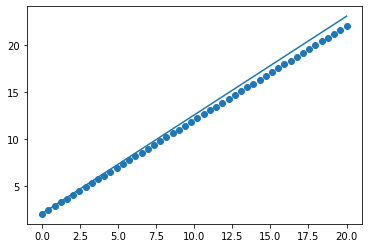

In [1083]:
plt.scatter(x,y)
plt.plot(x,y_predicted)
plt.show()

In [1084]:
cost_lst , theta0_lst ,theta1_lst , hypo_lst , theta0 , theta1,n_iter = unbaised_adam( x , y , n , theta0 , theta1 , m0 , m1 , v0 , v1 , alfa ,e ,beta1 , beta2 )

<ipython-input-964-be945db4fe5f>:34: RuntimeWarning: divide by zero encountered in double_scalars
  m0_hat = m0 / (1 - beta1**i)
<ipython-input-964-be945db4fe5f>:35: RuntimeWarning: divide by zero encountered in double_scalars
  m1_hat = m1 / (1 - beta1**i)
<ipython-input-964-be945db4fe5f>:37: RuntimeWarning: divide by zero encountered in double_scalars
  v0_hat = v0 / (1 - beta2**i)
<ipython-input-964-be945db4fe5f>:38: RuntimeWarning: divide by zero encountered in double_scalars
  v1_hat = v1 / (1 - beta2**i)


230


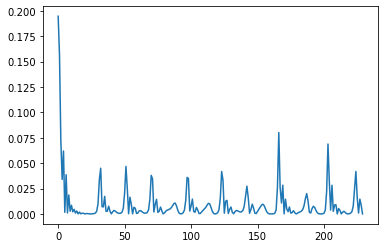

In [1085]:
plt.plot(cost_lst)
print(n_iter)

In [1086]:
y_predicted = theta0 + theta1 * x

In [1087]:
from sklearn.metrics import r2_score
r2_score(y, y_predicted)

0.9997350482726699

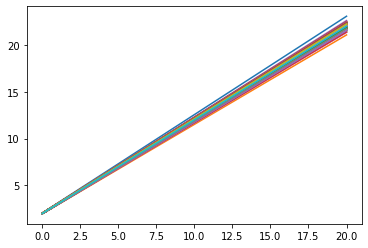

In [1088]:
for i in range(len(hypo_lst)):
    plt.plot(x,hypo_lst[i])

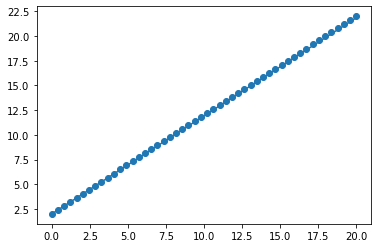

In [1089]:
plt.scatter(x,y)
plt.plot(x,y_predicted)
plt.show()

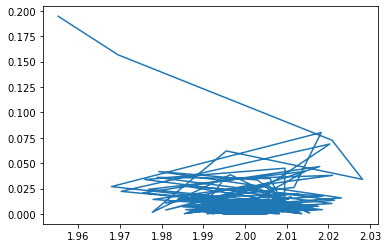

In [1090]:
plt.plot(theta0_lst,cost_lst)

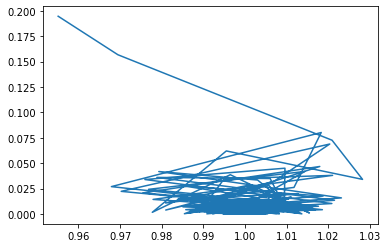

In [1091]:
plt.plot(theta1_lst,cost_lst)

In [1092]:
#when we use constant parameters 

In [1093]:
#adagard taked all  5000 iteration to rich min but in very smooth way because its an adaptive learning rate  
#algorithm depend on history of gradient
#the problem in agarad it accomulate for gradient square and in 1000 iteration 
#rms take 5000 iteration but make alot of over shoot in first to reach min but converge in last
#but it solve the problem od dense data to rich min

#in adam algorithm it take only 230 iteration it rich in very fast way but maked alot of overshoot and
#because it use momentum term


## Congratulations 
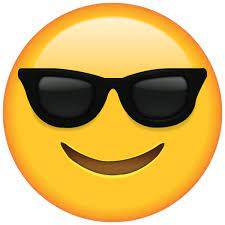